# Notebook pour faire des statistiques

## Chargement des données

In [1]:
import pandas
import matplotlib
import seaborn as sns
from tqdm import tnrange
from tqdm.notebook import tqdm

In [15]:
historical = pandas.read_csv("data/historical.csv")

In [16]:
historical.head()

,stop_id,stop_name,trip_id,arrival_time,departure_time,stop_sequence,service_id,trip_short_name,direction_id,date
0,2238,La Défense (Grande Arche),1128309950655739,13:02:00,13:02:00,16,2830995,ZEUS,1,20190921
1,2238,La Défense (Grande Arche),1128309950655739,13:02:00,13:02:00,16,2830995,ZEUS,1,20190922
2,2238,La Défense (Grande Arche),1128309950655739,13:02:00,13:02:00,16,2830995,ZEUS,1,20190928
3,2238,La Défense (Grande Arche),1128309950655739,13:02:00,13:02:00,16,2830995,ZEUS,1,20190929
4,2238,La Défense (Grande Arche),1128309950655739,13:02:00,13:02:00,16,2830995,ZEUS,1,20191005


In [4]:
def str_to_hour(string) :
    hour = int(string[0:2])
    minute = int(string[3:5])
    seconds = int(string[6:8])
    return hour+minute/60+seconds/3600

In [5]:
def date_to_date(date) :
    year = date//10000
    month = (date-year*10000)//100
    day = date-year*10000-month*100
    return month*30+day

In [17]:
historical['arrival_time'] = historical['arrival_time'].apply(str_to_hour)

In [18]:
historical['departure_time'] = historical['departure_time'].apply(str_to_hour)

In [19]:
historical['year'] = historical['date'].apply(date_to_year)

In [20]:
historical['date'] = historical['date'].apply(date_to_date)

In [25]:
historical

,stop_id,stop_name,trip_id,arrival_time,departure_time,stop_sequence,service_id,trip_short_name,direction_id,date,year
0,2238,La Défense (Grande Arche),1128309950655739,13.033333,13.033333,16,2830995,ZEUS,1,291,2019
1,2238,La Défense (Grande Arche),1128309950655739,13.033333,13.033333,16,2830995,ZEUS,1,292,2019
2,2238,La Défense (Grande Arche),1128309950655739,13.033333,13.033333,16,2830995,ZEUS,1,298,2019
3,2238,La Défense (Grande Arche),1128309950655739,13.033333,13.033333,16,2830995,ZEUS,1,299,2019
4,2238,La Défense (Grande Arche),1128309950655739,13.033333,13.033333,16,2830995,ZEUS,1,305,2019
...,...,...,...,...,...,...,...,...,...,...,...
1048570,1631,Vincennes,829288581780221,6.833333,6.833333,17,2928858,NAGE,0,185,2019
1048571,1631,Vincennes,829288581780221,6.833333,6.833333,17,2928858,NAGE,0,186,2019
1048572,1631,Vincennes,829288581780221,6.833333,6.833333,17,2928858,NAGE,0,187,2019
1048573,1631,Vincennes,829288581780221,6.833333,6.833333,17,2928858,NAGE,0,191,2019


In [86]:
historical[historical['stop_name']== "Torcy"]

,stop_id,stop_name,trip_id,arrival_time,departure_time,stop_sequence,service_id,trip_short_name,direction_id,date,year
111480,2516,Torcy,1128309950672661,12.766667,12.766667,4,2830995,UPAL,1,291,2019
111481,2516,Torcy,1128309950672661,12.766667,12.766667,4,2830995,UPAL,1,292,2019
111482,2516,Torcy,1128309950672661,12.766667,12.766667,4,2830995,UPAL,1,298,2019
111483,2516,Torcy,1128309950672661,12.766667,12.766667,4,2830995,UPAL,1,299,2019
111484,2516,Torcy,1128309950672661,12.766667,12.766667,4,2830995,UPAL,1,305,2019
...,...,...,...,...,...,...,...,...,...,...,...
998772,1636,Torcy,9829288581039029,15.366667,15.366667,21,2928858,OKLA,0,211,2019
998773,1636,Torcy,9829288581039029,15.366667,15.366667,21,2928858,OKLA,0,212,2019
998774,1636,Torcy,9829288581039029,15.366667,15.366667,21,2928858,OKLA,0,213,2019
998775,1636,Torcy,9829288581039029,15.366667,15.366667,21,2928858,OKLA,0,214,2019


C:\Users\stani\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arrival_time', ylabel='Density'>

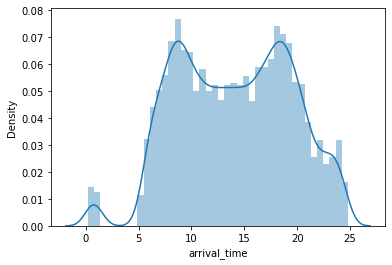

In [87]:
sns.distplot(historical[historical['stop_name']== "Torcy"]['arrival_time'])

In [10]:
(historical['arrival_time']-historical['departure_time']).describe()

count    1144664.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
dtype: float64

C:\Users\stani\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arrival_time', ylabel='Density'>

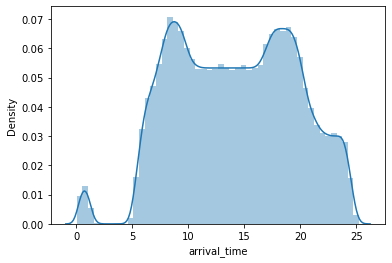

In [11]:
sns.distplot(historical['arrival_time'])

C:\Users\stani\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date', ylabel='Density'>

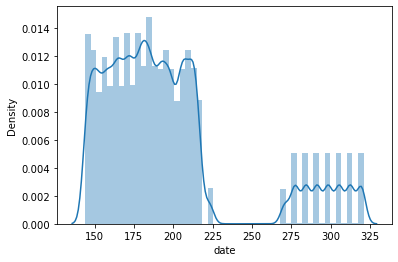

In [12]:
sns.distplot(historical['date'])

In [33]:
test = pandas.read_csv("data/real_data_utile/05299106 - Copie.csv", sep="\t")

In [34]:
entete = ['date'+str(i) for i in range(308)]
entete[0] = 'Station'
test.columns = entete

In [35]:
test.head()

,Station,date1,date2,date3,date4,date5,date6,date7,date8,date9,...,date298,date299,date300,date301,date302,date303,date304,date305,date306,date307
0,Palaiseau Ville,201805291316,100,A,50,R,50,201805291322,201805291346,201805291337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,La Vallee,201805291316,100,A,50,R,50,201805291324,201805291346,201805291339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Camille Claudel,201805291316,100,A,50,R,50,201805291326,201805291346,201805291341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ensta - les Joncherettes,201805291316,100,A,50,R,50,201805291328,201805291346,201805291343,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Polytechnique Lozere,201805291316,100,A,50,R,50,201805291329,201805291346,201805291344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
test.describe()

,date1,date2,date4,date6,date7,date8,date9,date10,date11,date12,...,date298,date299,date300,date301,date302,date303,date304,date305,date306,date307
count,1.260700e+04,12607.000000,12607.000000,12607.000000,1.260700e+04,1.260700e+04,1.260700e+04,1.260700e+04,1.259300e+04,1.259300e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2.018053e+11,53.318077,26.900769,26.417308,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.933126e+02,36.256830,18.416409,19.288156,1.916924e+02,1.923703e+02,1.865142e+02,1.866324e+02,1.864655e+02,1.861981e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.018053e+11,2.000000,0.000000,0.000000,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.018053e+11,21.000000,11.000000,9.000000,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.018053e+11,40.000000,19.000000,20.000000,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.018053e+11,100.000000,50.000000,50.000000,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2.018053e+11,100.000000,50.000000,50.000000,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
test

,Station,date1,date2,date3,date4,date5,date6,date7,date8,date9,...,date298,date299,date300,date301,date302,date303,date304,date305,date306,date307
0,Palaiseau Ville,201805291316,100,A,50,R,50,201805291322,201805291346,201805291337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,La Vallee,201805291316,100,A,50,R,50,201805291324,201805291346,201805291339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Camille Claudel,201805291316,100,A,50,R,50,201805291326,201805291346,201805291341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ensta - les Joncherettes,201805291316,100,A,50,R,50,201805291328,201805291346,201805291343,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Polytechnique Lozere,201805291316,100,A,50,R,50,201805291329,201805291346,201805291344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12602,Jean Monnet,201805291957,7,A,4,R,3,201805292017,201805292024,201805292042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12603,D'Alembert,201805291957,7,A,4,R,3,201805292019,201805292024,201805292046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12604,Lycee Emilie de Breteuil,201805291957,7,A,4,R,3,201805292022,201805292024,201805292049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12605,Saint-Quentin Gare Routiere (Av des Pres),201805291957,7,A,4,R,3,201805292024,201805292024,201805292051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
test2 = test.transpose()

In [39]:
test2.head()

,0,1,2,3,4,5,6,7,8,9,...,12597,12598,12599,12600,12601,12602,12603,12604,12605,12606
Station,Palaiseau Ville,La Vallee,Camille Claudel,Ensta - les Joncherettes,Polytechnique Lozere,Polytechnique Laboratoire,Fresnel,Palaiseau - Campus,Corbeville,Universite Paris-Saclay,...,Genevieve Aube - Rd36,Merantais,Golf National,Technocentre Gare Routiere,Le Corbusier,Jean Monnet,D'Alembert,Lycee Emilie de Breteuil,Saint-Quentin Gare Routiere (Av des Pres),Orme des Merisiers
date1,201805291316,201805291316,201805291316,201805291316,201805291316,201805291316,201805291316,201805291316,201805291316,201805291316,...,201805291957,201805291957,201805291957,201805291957,201805291957,201805291957,201805291957,201805291957,201805291957,201805291957
date2,100,100,100,100,100,100,100,100,100,100,...,7,7,7,2,7,7,7,7,7,13
date3,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
date4,50,50,50,50,50,50,50,50,50,50,...,4,4,4,1,4,4,4,4,4,0


In [40]:
test2.columns = test2.iloc[0]
test2.drop('Station',inplace=True)
test2.drop('date2',inplace=True)
test2.drop('date3',inplace=True)
test2.drop('date4',inplace=True)
test2.drop('date5',inplace=True)
test2.drop('date6',inplace=True)
test2.head()

Station,Palaiseau Ville,La Vallee,Camille Claudel,Ensta - les Joncherettes,Polytechnique Lozere,Polytechnique Laboratoire,Fresnel,Palaiseau - Campus,Corbeville,Universite Paris-Saclay,...,Genevieve Aube - Rd36,Merantais,Golf National,Technocentre Gare Routiere,Le Corbusier,Jean Monnet,D'Alembert,Lycee Emilie de Breteuil,Saint-Quentin Gare Routiere (Av des Pres),Orme des Merisiers
date1,201805291316,201805291316,201805291316,201805291316,201805291316,201805291316,201805291316,201805291316,201805291316,201805291316,...,201805291957,201805291957,201805291957,201805291957,201805291957,201805291957,201805291957,201805291957,201805291957,201805291957
date7,201805291322,201805291324,201805291326,201805291328,201805291329,201805291330,201805291316,201805291318,201805291320,201805291323,...,201805292007,201805292009,201805292010,201805292013,201805292015,201805292017,201805292019,201805292022,201805292024,201805292030
date8,201805291346,201805291346,201805291346,201805291346,201805291346,201805291346,201805291358,201805291358,201805291358,201805291358,...,201805292024,201805292024,201805292024,201805292024,201805292024,201805292024,201805292024,201805292024,201805292024,201805292052
date9,201805291337,201805291339,201805291341,201805291343,201805291344,201805291345,201805291316,201805291318,201805291320,201805291323,...,201805292037,201805292039,201805292040,201805292011,201805292040,201805292042,201805292046,201805292049,201805292051,201805292005
date10,201805291401,201805291401,201805291401,201805291401,201805291401,201805291401,201805291331,201805291331,201805291331,201805291331,...,201805292051,201805292051,201805292051,201805292052,201805292051,201805292051,201805292051,201805292051,201805292051,201805292027


In [81]:
test2['Gare de Lyon']

KeyError: 'Gare de Lyon'

In [52]:
test2.head()

Station,Palaiseau Ville,La Vallee,Camille Claudel,Ensta - les Joncherettes,Polytechnique Lozere,Polytechnique Laboratoire,Fresnel,Palaiseau - Campus,Corbeville,Universite Paris-Saclay,...,Genevieve Aube - Rd36,Merantais,Golf National,Technocentre Gare Routiere,Le Corbusier,Jean Monnet,D'Alembert,Lycee Emilie de Breteuil,Saint-Quentin Gare Routiere (Av des Pres),Orme des Merisiers
date1,201805291316,201805291316,201805291316,201805291316,201805291316,201805291316,201805291316,201805291316,201805291316,201805291316,...,201805291957,201805291957,201805291957,201805291957,201805291957,201805291957,201805291957,201805291957,201805291957,201805291957
date7,201805291322,201805291324,201805291326,201805291328,201805291329,201805291330,201805291316,201805291318,201805291320,201805291323,...,201805292007,201805292009,201805292010,201805292013,201805292015,201805292017,201805292019,201805292022,201805292024,201805292030
date8,201805291346,201805291346,201805291346,201805291346,201805291346,201805291346,201805291358,201805291358,201805291358,201805291358,...,201805292024,201805292024,201805292024,201805292024,201805292024,201805292024,201805292024,201805292024,201805292024,201805292052
date9,201805291337,201805291339,201805291341,201805291343,201805291344,201805291345,201805291316,201805291318,201805291320,201805291323,...,201805292037,201805292039,201805292040,201805292011,201805292040,201805292042,201805292046,201805292049,201805292051,201805292005
date10,201805291401,201805291401,201805291401,201805291401,201805291401,201805291401,201805291331,201805291331,201805291331,201805291331,...,201805292051,201805292051,201805292051,201805292052,201805292051,201805292051,201805292051,201805292051,201805292051,201805292027


In [53]:
test2.describe()

Station,Palaiseau Ville,La Vallee,Camille Claudel,Ensta - les Joncherettes,Polytechnique Lozere,Polytechnique Laboratoire,Fresnel,Palaiseau - Campus,Corbeville,Universite Paris-Saclay,...,Genevieve Aube - Rd36,Merantais,Golf National,Technocentre Gare Routiere,Le Corbusier,Jean Monnet,D'Alembert,Lycee Emilie de Breteuil,Saint-Quentin Gare Routiere (Av des Pres),Orme des Merisiers
count,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,...,1.500000e+01,1.500000e+01,1.500000e+01,5,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,2.700000e+01
unique,1.710000e+02,1.380000e+02,1.670000e+02,1.660000e+02,1.670000e+02,1.430000e+02,1.400000e+02,1.530000e+02,1.500000e+02,1.530000e+02,...,1.500000e+01,1.500000e+01,1.500000e+01,5,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.100000e+01,2.700000e+01
top,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,...,2.018053e+11,2.018053e+11,2.018053e+11,201805292024,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11,2.018053e+11
freq,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00


In [43]:
test2["La Vallee"]

Station,La Vallee,La Vallee,La Vallee,La Vallee,La Vallee,La Vallee,La Vallee,La Vallee,La Vallee,La Vallee,...,La Vallee,La Vallee,La Vallee,La Vallee,La Vallee,La Vallee,La Vallee,La Vallee,La Vallee,La Vallee
date1,201805291316,201805291317,201805291318,201805291319,201805291320,201805291321,201805291322,201805291323,201805291324,201805291325,...,201805291948,201805291949,201805291950,201805291951,201805291952,201805291953,201805291954,201805291955,201805291956,201805291957
date7,201805291324,201805291324,201805291324,201805291324,201805291324,201805291324,201805291324,201805291324,201805291324,201805291339,...,201805291954,201805291954,201805291954,201805291954,201805291954,201805291954,201805291954,201805292004,201805292004,201805292004
date8,201805291346,201805291346,201805291346,201805291346,201805291346,201805291346,201805291346,201805291346,201805291346,201805291401,...,201805292016,201805292016,201805292016,201805292016,201805292016,201805292016,201805292016,201805292051,201805292051,201805292051
date9,201805291339,201805291339,201805291339,201805291339,201805291339,201805291339,201805291339,201805291339,201805291339,201805291354,...,201805292004,201805292004,201805292004,201805292004,201805292004,201805292004,201805292004,201805292009,201805292009,201805292009
date10,201805291401,201805291401,201805291401,201805291401,201805291401,201805291401,201805291401,201805291401,201805291401,201805291416,...,201805292051,201805292051,201805292051,201805292051,201805292051,201805292051,201805292051,201805292031,201805292031,201805292031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
date303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
len(test3.columns)

394

In [60]:
def datehour_to_hour(datehour) :
    schedule = datehour%10000
    hour = schedule//100
    minutes = schedule-hour*100
    return hour+minutes/60

In [64]:
test3 = test2["La Vallee"]
index3 = ["La Vallee"]*394
index3[0] = 'test'
test3.columns = index3
test3['test'] = test3['test'].apply(datehour_to_hour)

<ipython-input-64-bc53f53647a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3['test'] = test3['test'].apply(datehour_to_hour)


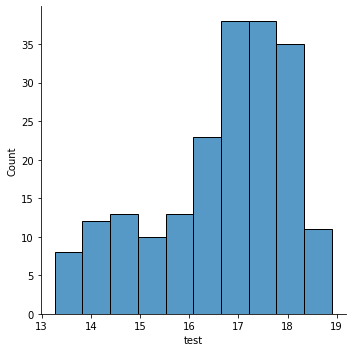

In [65]:
sns.displot(test3["test"])